# Topic 1. Machine Learning 


## Supervised, unsupervised methods

In this lab we will exercise different aspects related to the solution to initial steps of ML problem solving. In particular: 

1- Methods for reading and manipulating real-world datasets (pandas library)

2- Methods for problem visualization and analysis  (seaborn library)

3- Supervised classification problems 

4- Unsupervised classification problems  




We import all the libraries required for the exercises

In [81]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import binarize
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import axes3d  
from sklearn import preprocessing
from sklearn.pipeline import Pipeline

##  Reading and manipulating datasets with pandas 

We will use the Parkinsons Telemonitoring Data Set available from https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/
    
    This dataset contains 16 biomedical voice measurements from 42 people with early-stage Parkinson's disease. 
    
    The main aim of the data is to predict the motor and total UPDRS scores ('motor_UPDRS' and 'total_UPDRS') from the 16 voice measures. 

    This can be seen as a regression problem. 

### Download the dataset  and open using the following pandas commands. Pandas is an extensively used python library: https://pandas.pydata.org/

In [4]:
# The dataset is read
df = pd.read_csv('parkinsons_updrs.data')

# The columns of the dataset are printed. These columns include the features and 
# the target variables 'motor_UPDRS' and 'total_UPDRS') 
print(df.columns)

Index(['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')


In [5]:
# There are 42 subjects. We will use data for the first one
indices_subject_1 = df['subject#']==1

# Records of subject_1
df_subject_1 = df[indices_subject_1]

# Records of the dataframe are transformed to a matrix and we print its shape
data = df_subject_1.values
print('The shape of the matrix is ',data.shape)

The shape of the matrix is  (149, 22)


## Visualizing data with seaborn


### seaborn is a python library that allows the exploration of data. A brief overview of the functionalities of seaborn can be accessed from: https://seaborn.pydata.org/examples/index.html

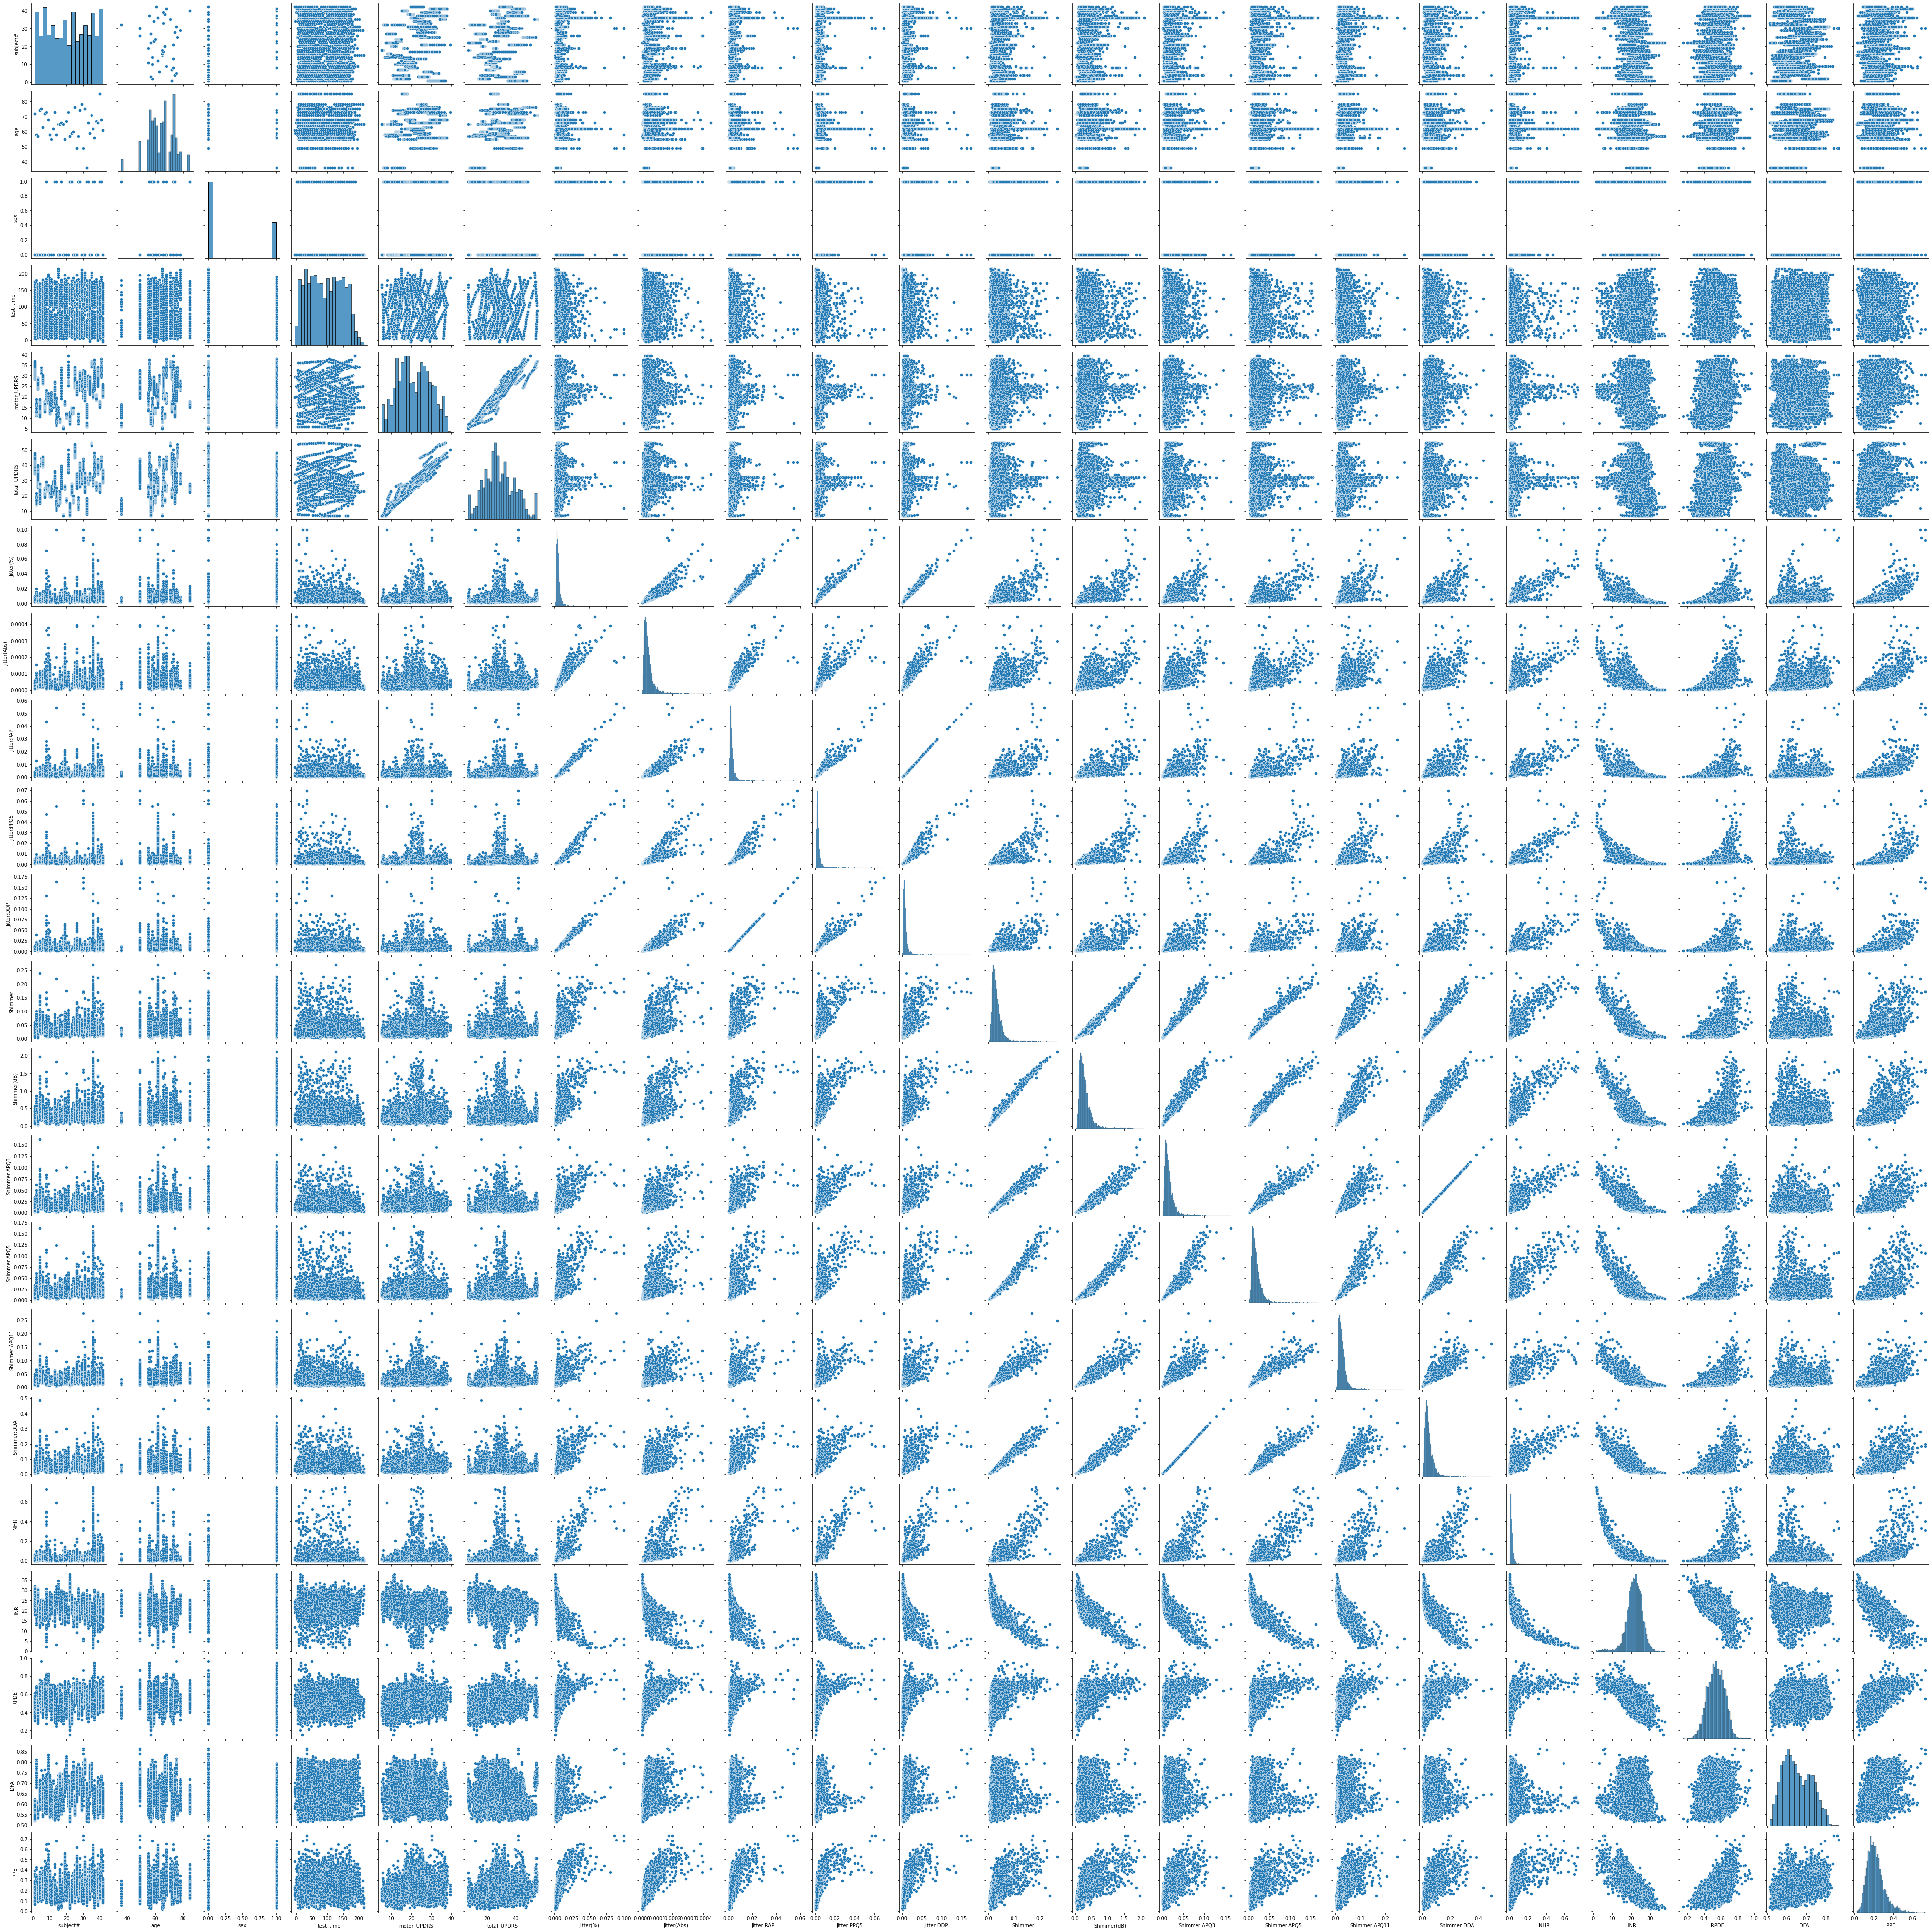

In [6]:
# We visualize the relationships between variables in the Parkinson dataset
sns.pairplot(df)
plt.show()

### We visualize the distribution of the variables, ordered depending the variance they have

ValueError: The truth value of a Index is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

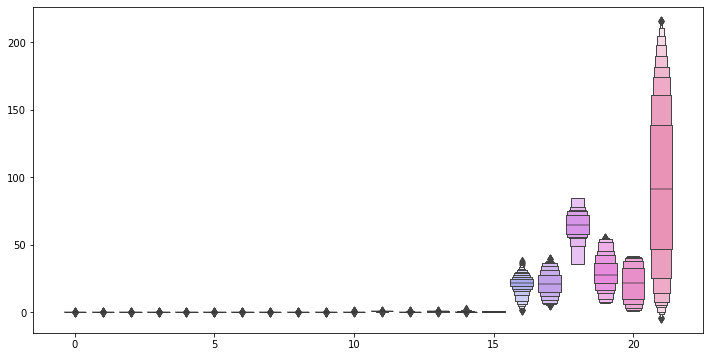

In [19]:
order = df.std().sort_values().index
fig = plt.figure(figsize=(12,6))
#chart = sns.lvplot(data=df, order=order, scale="linear")
chart = sns.boxenplot(data=df, order=order, scale="linear")
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
plt.show()

### We scale variables for improved visualization

ValueError: The truth value of a Index is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

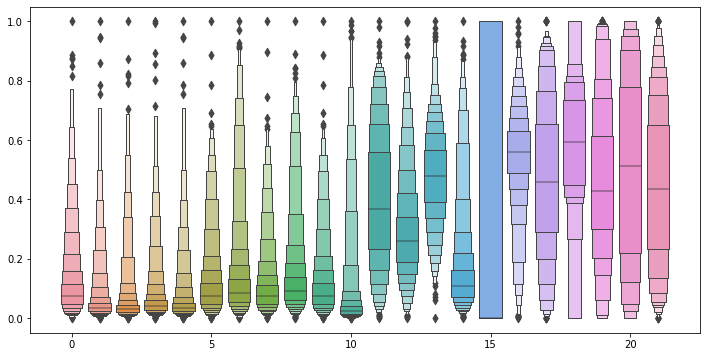

In [20]:
df_sca = df - df.min()
df_sca /= df_sca.max()

fig = plt.figure(figsize=(12,6))
#chart = sns.lvplot(data=df_sca, order=order, scale="linear")
chart = sns.boxenplot(data=df_sca, order=order, scale="linear")
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
plt.show()

# Exercise 1

1.1) Using only data from the first subject, create train and test datasets to predict the total_UPDRS score using the following features: ['Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP','Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5','Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']
      
1.2) Use a linear regressor to predict the response variable in the test data from a model learned in the train data.

1.3) Use a random forest regressor to predict the response variable in the test data from a model learned in the train data.

1.4) Use a Gaussian process regressor to predict the response variable in the test data from a model learned in the train data.

1.5) Use the seaborn and matplotlib libraries to visualize the median_absolute_error of the three regressor algorithms used in exercises 1.2, 1.3, and 1.4. 
Hints: Use https://seaborn.pydata.org/generated/seaborn.barplot.html or https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html



### Answer to 1.1)

In [39]:
# From the data, we select the response variable that we are going to model
# It is the total_UPDRS score
target = df_subject_1['total_UPDRS']

# The 16 variables that measure the voice will be used as features. 
features = df_subject_1[['Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP','Shimmer', 'Shimmer(dB)',\
                        'Shimmer:APQ3', 'Shimmer:APQ5','Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']]

# We divide the dataset for the first subject in training and test data. Even rows are in the train set 
# and odd rows in the test set. 

# Train set 
train_features = features[0::2]
train_target = target[0::2]
train_n_samples = len(train_target)

# Test set
test_features = features[1::2]
test_target = target[1::2]
test_n_samples = len(test_target)

### Answer to 1.2)

In [40]:
regressor = LinearRegression()
regressor.fit(train_features,train_target)
predicted_test_target = regressor.predict(test_features)

###  Answer to 1.3)

In [41]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(train_features,train_target)
rf_predicted_test_target = rf_regressor.predict(test_features)

### Answer to 1.4)

In [42]:
gp_regressor = GaussianProcessRegressor()
gp_regressor.fit(train_features,train_target)
gp_predicted_test_target = gp_regressor.predict(test_features)

### Answer to 1.5)

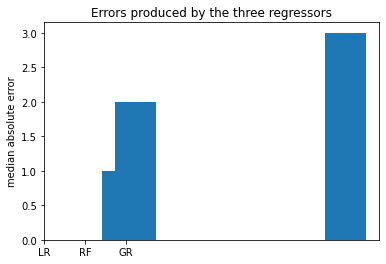

In [71]:
from sklearn.metrics import median_absolute_error
width = 1.0
n_regressors = 3
error_lr = median_absolute_error(test_target, predicted_test_target)
error_rf = median_absolute_error(test_target, rf_predicted_test_target)
error_gp = median_absolute_error(test_target, gp_predicted_test_target)

error_values = [error_lr,error_rf,error_gp]
ind = np.arange(n_regressors)+1

# Change first two parameters
p1 = plt.bar(error_values, ind, width)


plt.ylabel('median absolute error')
plt.title('Errors produced by the three regressors')
plt.xticks(ind, ('LR', 'RF', 'GR',))


plt.show()

 ## yacht_hydrodynamics dataset 

We download the yacht_hydrodynamics dataset from https://archive.ics.uci.edu/ml/datasets/Yacht+Hydrodynamics

The goal of this dataset is the prediction of residuary resistance of sailing yachts from a number of features.  Essential inputs include the basic hull dimensions and the boat velocity. 

This can be approached as a regression problem

In [64]:
# https://archive.ics.uci.edu/ml/datasets/Yacht+Hydrodynamics
data = np.loadtxt('yacht_hydrodynamics.data')

# The Pandas dataframe is created
df = pd.DataFrame(data,columns=['Long. position', 'Prismatic coef.', 'LD ratio', 'BD ratio', 
                                'LB ratio', 'Froude numb.', 'Resistance'])

In [65]:
data

array([[-2.3  ,  0.568,  4.78 , ...,  3.17 ,  0.125,  0.11 ],
       [-2.3  ,  0.568,  4.78 , ...,  3.17 ,  0.15 ,  0.27 ],
       [-2.3  ,  0.568,  4.78 , ...,  3.17 ,  0.175,  0.47 ],
       ...,
       [-2.3  ,  0.6  ,  4.34 , ...,  2.73 ,  0.4  , 19.59 ],
       [-2.3  ,  0.6  ,  4.34 , ...,  2.73 ,  0.425, 30.48 ],
       [-2.3  ,  0.6  ,  4.34 , ...,  2.73 ,  0.45 , 46.66 ]])

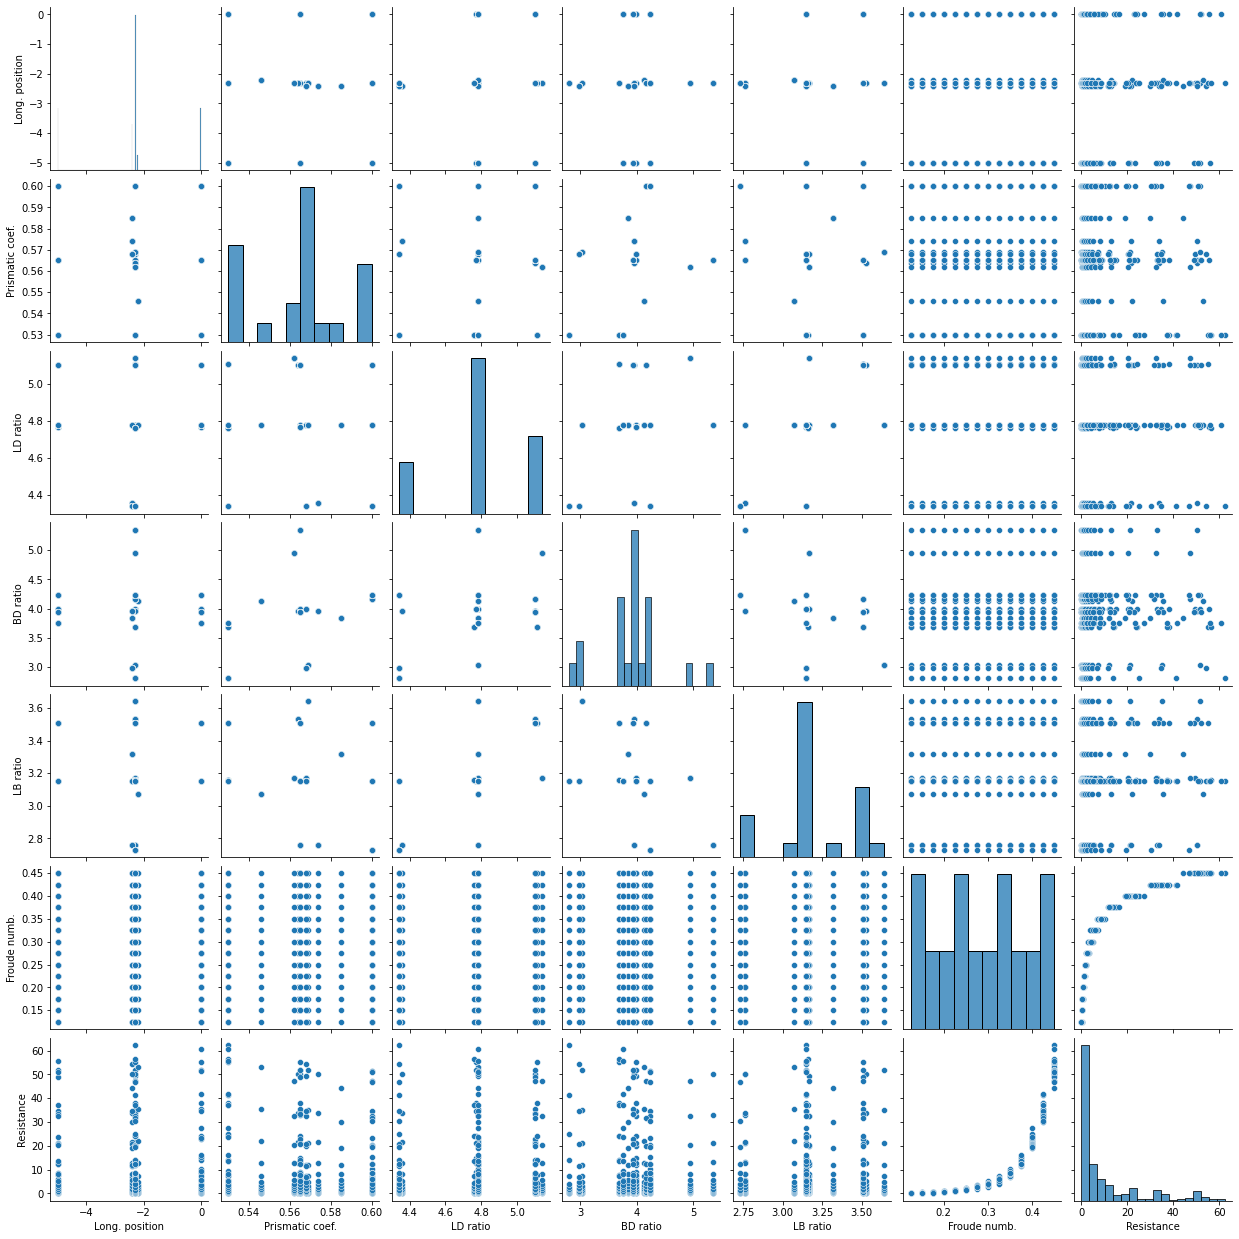

In [66]:
# Visualization of the dataset
sns.pairplot(df)
plt.show()

## Exercise 2

2.1) Create train and test datasets from the ship data

2.2) Use kmeans to separate the train data into five clusters

2.3) Use a dimensionality reduction method to visualize the clusters in three dimensions
Hint: Use a different color to visualize each of the five clusters
    
2.4) Create a pipeline that selects two variables and applies linear regressor to predict the ship resistance

2.5) Visualize the original resistance data versus the predictions made by the pipeline

### Answer to 2.1)

In [69]:
yach_features = df[['Long. position', 'Prismatic coef.', 'LD ratio', 'BD ratio', 
                                'LB ratio', 'Froude numb.']]
yach_target = df['Resistance']

# We split the data into two sets, training and test

yach_train_features = yach_features[0::2]
yach_train_target = yach_target[0::2]
yach_train_n_samples = len(yach_train_target)

yach_test_features = yach_features[1::2]
yach_test_target = yach_target[1::2]
yach_test_n_samples = len(yach_test_target)

### Answer to 2.2)

In [70]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(yach_train_features)
yach_train_clusters = kmeans.transform(yach_train_features)
print(yach_train_clusters)
#test_clusters = kmeans.predict(yach_test_features)

[[1.20106005 2.70619941 2.30727442 0.15581823 1.10718708]
 [1.19584499 2.70388891 2.304564   0.10853258 1.10152768]
 [1.19270501 2.70250167 2.30293622 0.06541652 1.09811804]
 [1.19165652 2.70203909 2.30239337 0.042182   1.09697913]
 [1.19270501 2.70250167 2.30293622 0.06541652 1.09811804]
 [1.19584499 2.70388891 2.304564   0.10853258 1.10152768]
 [1.20106005 2.70619941 2.30727442 0.15581823 1.10718708]
 [2.22770179 2.89173343 2.52232477 1.03279302 0.4752777 ]
 [2.22489444 2.88957129 2.51984568 1.02672364 0.46194035]
 [2.22320832 2.88827323 2.51835705 1.02306473 0.45374981]
 [2.222646   2.88784041 2.51786065 1.02184218 0.45098657]
 [2.22320832 2.88827323 2.51835705 1.02306473 0.45374981]
 [2.22489444 2.88957129 2.51984568 1.02672364 0.46194035]
 [2.22770179 2.89173343 2.52232477 1.03279302 0.4752777 ]
 [0.37003682 3.07014759 2.72503326 1.46442271 2.49157879]
 [0.35274247 3.06811119 2.72273874 1.46014858 2.48906908]
 [0.34194627 3.06688869 2.7213611  1.45757809 2.48756204]
 [0.33827097 3

### Answer to 2.3)

<IPython.core.display.Javascript object>


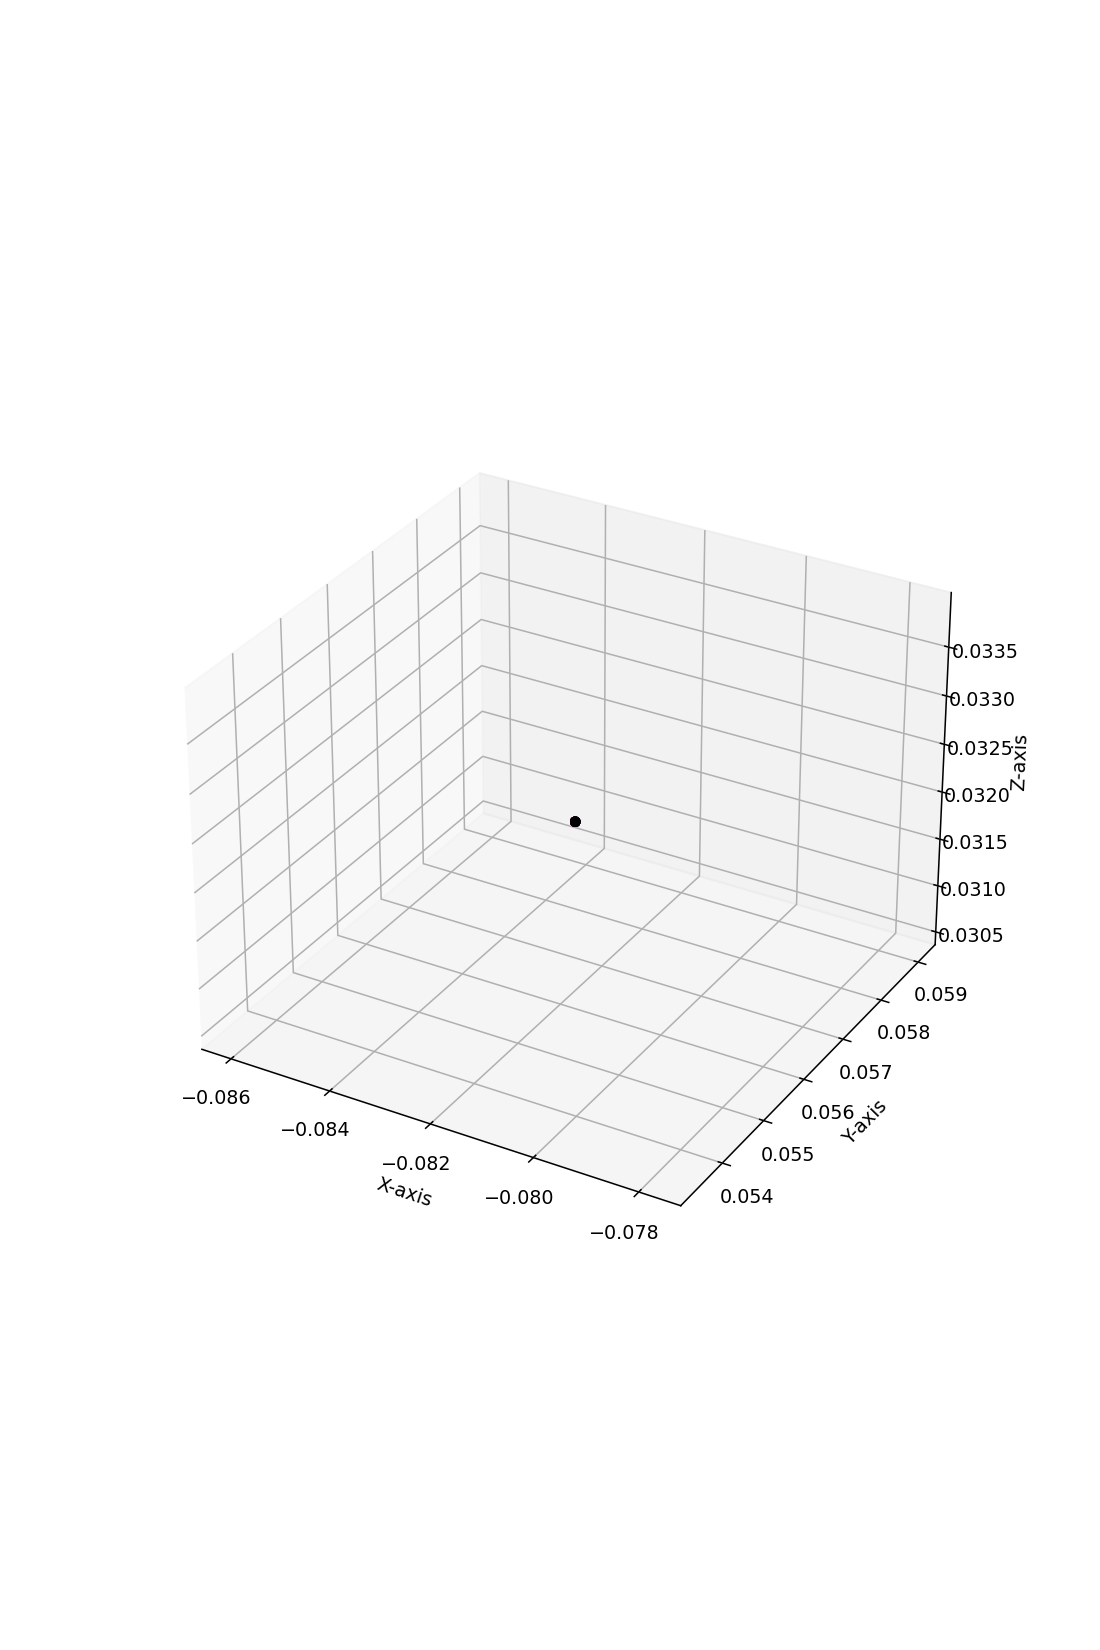

(array([0, 1, 2, 3, 4]),)
(array([0, 1, 2, 3, 4]),)
(array([0, 1, 2, 3, 4]),)
(array([0, 1, 2, 3, 4]),)
(array([0, 1, 2, 3, 4]),)


Text(0.5, 0, 'Z-axis')

In [100]:
colors = 'brgmk'
n_components = 3
pca = PCA(n_components)
pca.fit(yach_train_features)

dim3_yach_train_data = pca.transform(yach_train_features)


fig = plt.figure(figsize=(8, 12))
ax = fig.add_subplot(111, projection='3d')

for i,c in enumerate(colors):
    #print(i,c)

    index_cluster = np.where(yach_train_clusters[i])
    x_vals = dim3_yach_train_data[index_cluster,0]
    y_vals = dim3_yach_train_data[index_cluster,1]
    z_vals = dim3_yach_train_data[index_cluster,2]
    # Plot the values
    ax.scatter(x_vals, y_vals, z_vals, c = c, marker='o')
    print(index_cluster)

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

In [98]:
plt.close()

### Answer to 2.4)

In [93]:
feature_selector = SelectKBest(k=2)
linear_regressor = LinearRegression()

yach_pipeline = Pipeline([("feature_selector", feature_selector), ("linear_regressor", linear_regressor)])
yach_pipeline.fit(yach_train_features, yach_train_target)

yach_pipeline_test_prediction = yach_pipeline.predict(yach_test_features)
yach_pipeline_test_prediction

/home/juletx/.local/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


array([-3.6881367 ,  1.09511005,  5.87835681, 10.66160356, 15.44485031,
       20.22809707, 25.01134382, -3.5288694 ,  1.25437736,  6.03762411,
       10.82087086, 15.60411762, 20.38736437, 25.17061112, -3.91614042,
        0.86710634,  5.65035309, 10.43359984, 15.21684659, 20.00009335,
       24.7833401 , -3.68143071,  1.10181604,  5.8850628 , 10.66830955,
       15.4515563 , 20.23480306, 25.01804981, -3.68310721,  1.10013955,
        5.8833863 , 10.66663305, 15.44987981, 20.23312656, 25.01637331,
       -3.51881041,  1.26443634,  6.0476831 , 10.83092985, 15.6141766 ,
       20.39742336, 25.18067011, -3.8490805 ,  0.93416625,  5.71741301,
       10.50065976, 15.28390651, 20.06715327, 24.85040002, -3.66298923,
        1.12025752,  5.90350428, 10.68675103, 15.46999778, 20.25324454,
       25.03649129, -3.71160767,  1.07163908,  5.85488584, 10.63813259,
       15.42137934, 20.2046261 , 24.98787285, -3.6881367 ,  1.09511005,
        5.87835681, 10.66160356, 15.44485031, 20.22809707, 25.01

### Answer to 2.5)

<IPython.core.display.Javascript object>


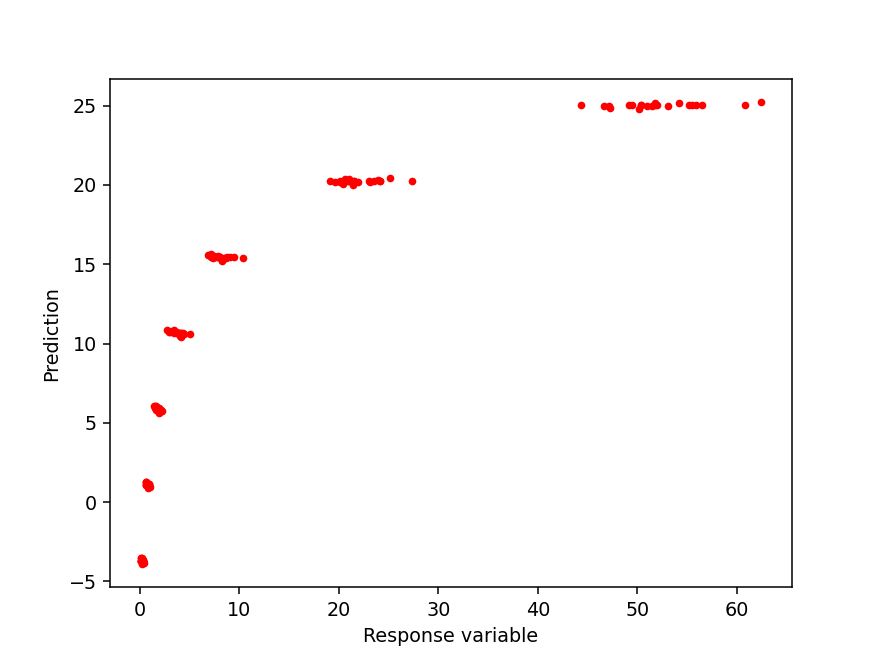

In [99]:
plt.figure()
plt.plot(yach_test_target, yach_pipeline_test_prediction, 'r.')
plt.xlabel('Response variable')
plt.ylabel('Prediction')
plt.show()

## Exercise 3

Moving forward to a real classification problem,

3.1) Fetch a real database from the uci dataset (https://archive.ics.uci.edu/ml/datasets.php)

3.2) Define and fit a classifier using the data.

3.3) Use cross-validation to estimate the accuracy, recall, and precision of the classifier.

3.4) Use a pre-processing method to transform the data before feeding it to the classifier

3.5) Create a Pipeline which includes (at least) one preprocessing method, and a classifier.

3.6) Apply the pipeline to the data.

3.7) Use Tpot to automatically generate a pipeline